## Problem Statement

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


There are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

**Attribute Information:**

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Import

In [2]:
ds=pd.read_csv('temperature.csv')
df=pd.DataFrame(ds)
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


## Data Analysis

In [3]:
df.shape

(7752, 25)

Our dataset has 25 features including two target variables, with 7752 observations.

Since our target variables can have continuous values, this is Regression problem.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
pd.options.display.max_columns = df.shape[1] 

In [6]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


- The station values varies between 1 to 25. The mean station value is 13. 
- The present Tmax ranges from 20 to 37. 
- The present Tmin ranges from 11 to 29.
- Standard deviation is very high for Solar radiation. The data is scattered in this case.


## Checking Missing Data

In [7]:
print("Missing in our dataset: ")
display(df.isnull().sum())

Missing in our dataset: 


station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

There are null values in our dataset.

In [8]:
df_cat=df.select_dtypes(exclude='object')
df_cat.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [10]:
for i in df_cat.columns:
    df[i]=df[i].fillna(df[i].mean())
    

In [20]:
df['Date']=df['Date'].fillna(df['Date'].mode()[0])

In [21]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

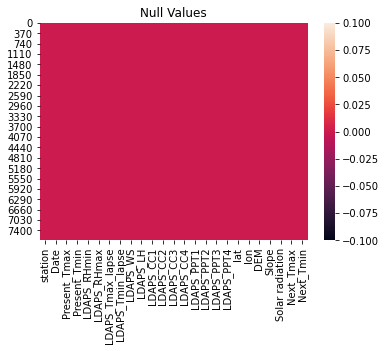

In [22]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

There are no null values left now.

## Plotting of Data

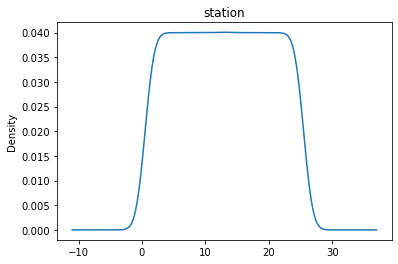

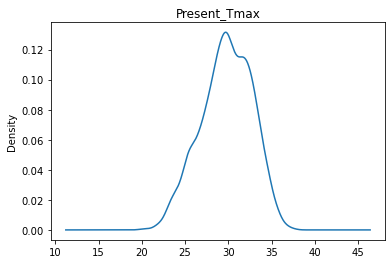

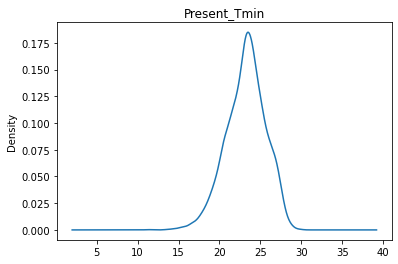

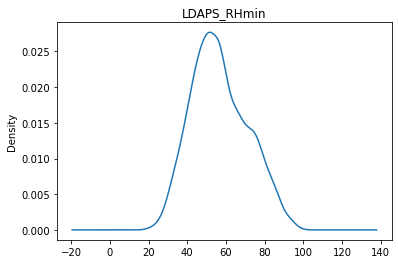

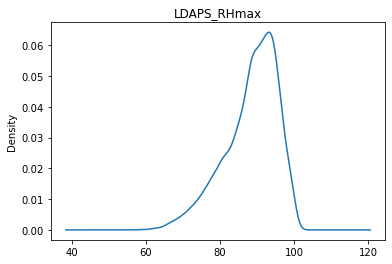

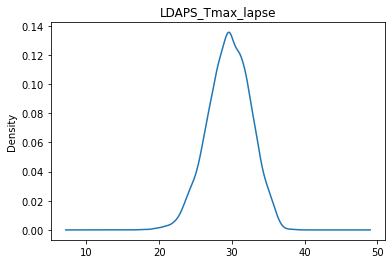

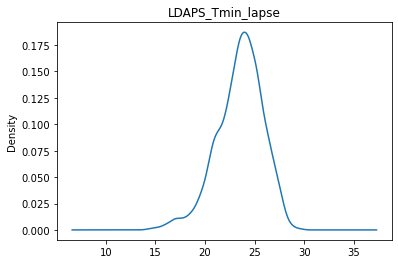

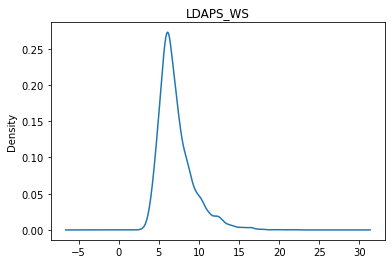

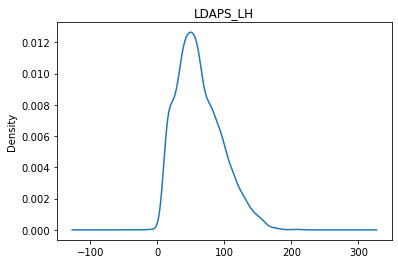

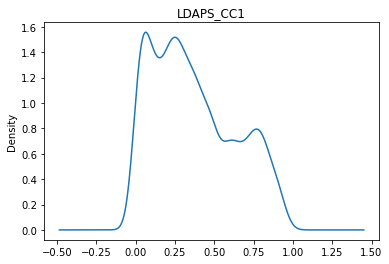

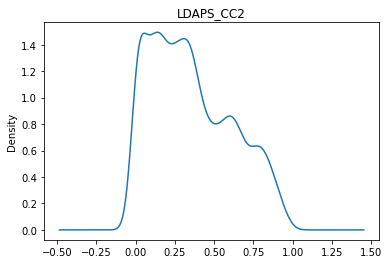

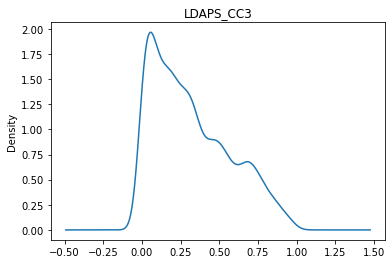

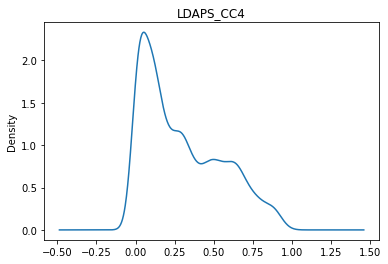

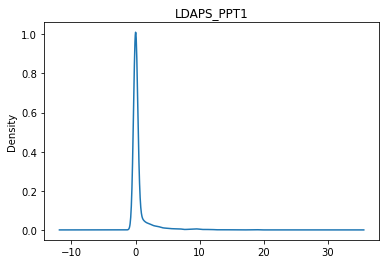

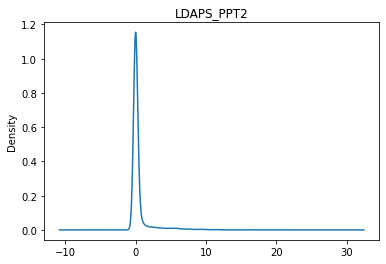

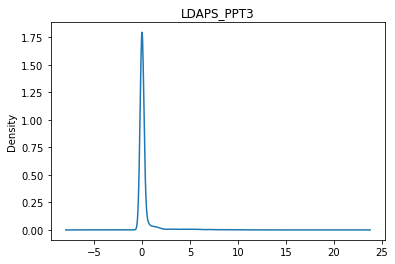

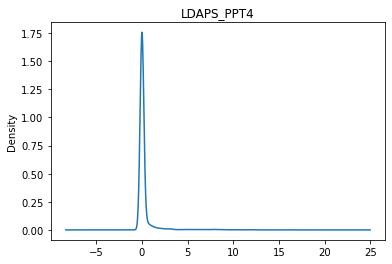

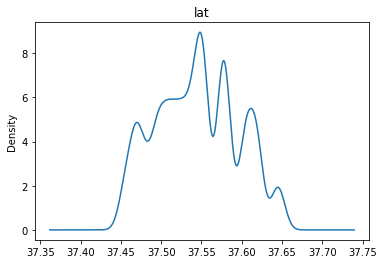

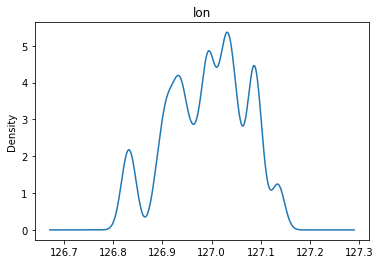

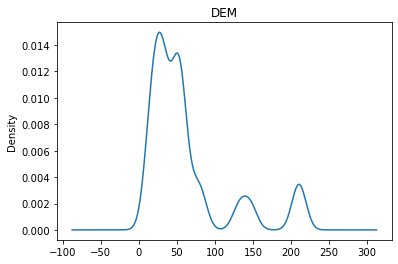

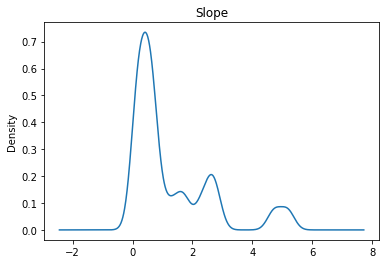

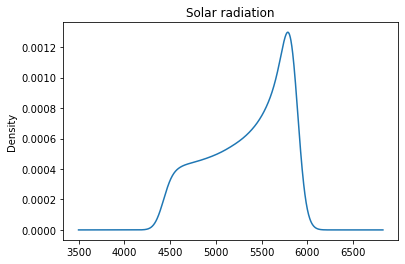

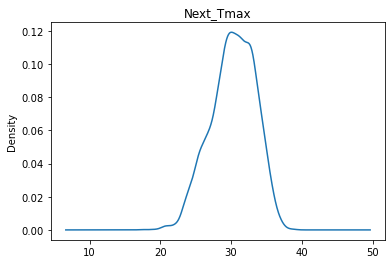

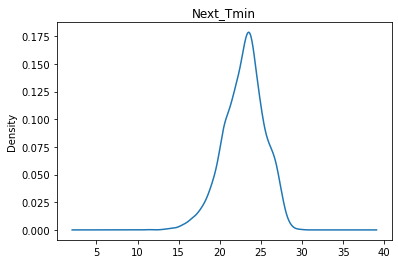

In [32]:
for i in df.columns:
    if df[i].dtype!='object':
        plt.figure()
        df[i].plot(kind='density')
        plt.title(i)

- There is skewness in most of the columns. We will be handling this in further steps.
- LDAPS_PPT1,LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4 has highest frequency at 0.

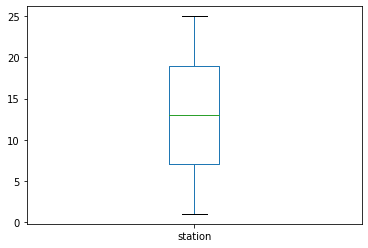

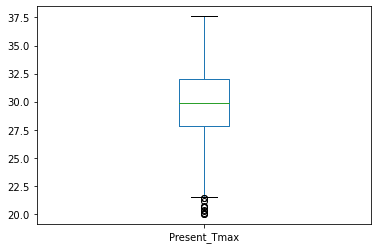

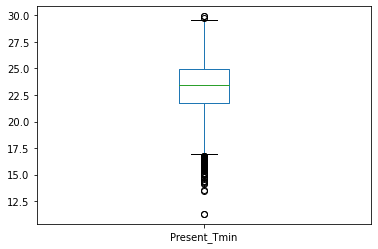

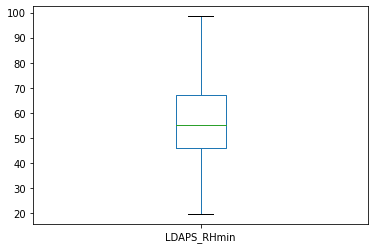

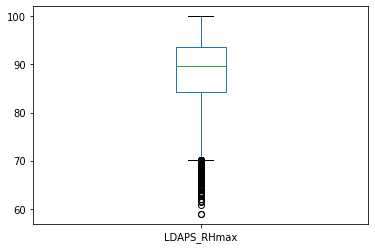

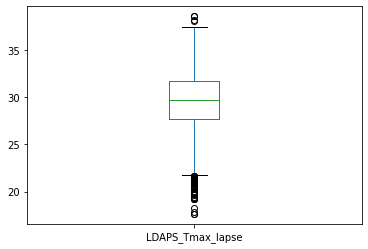

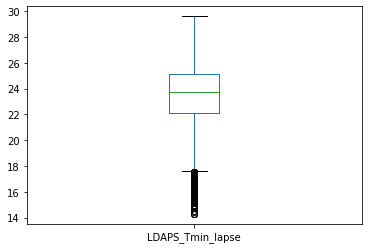

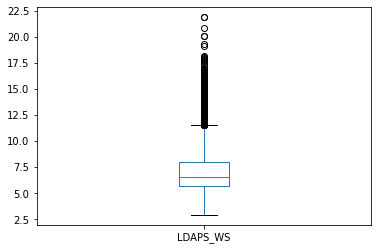

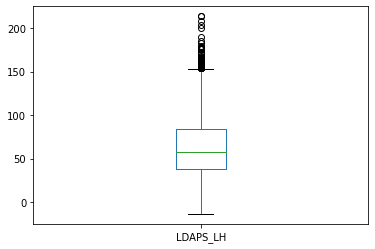

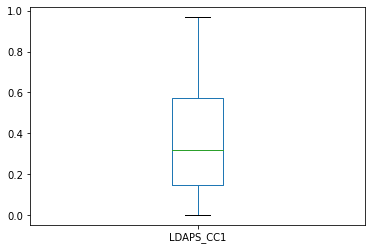

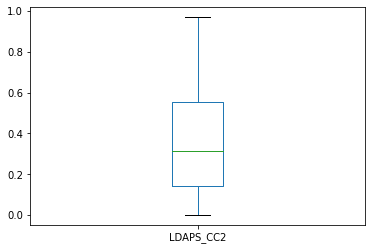

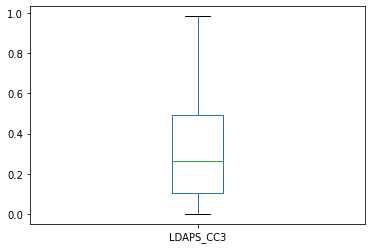

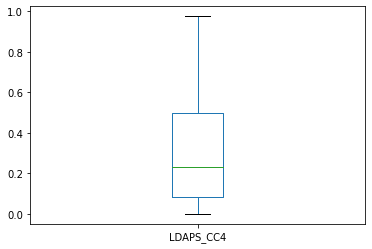

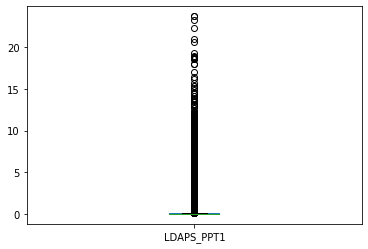

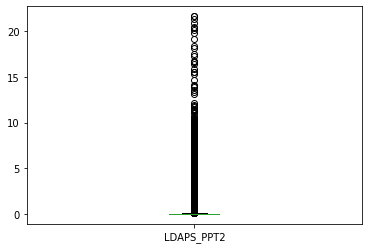

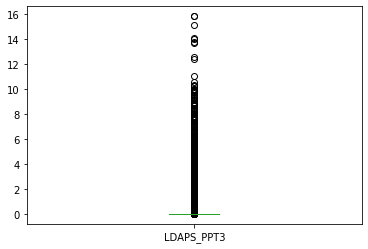

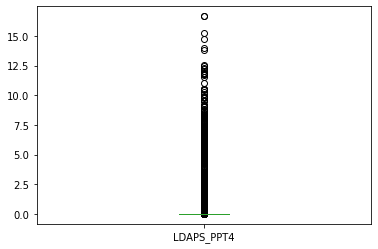

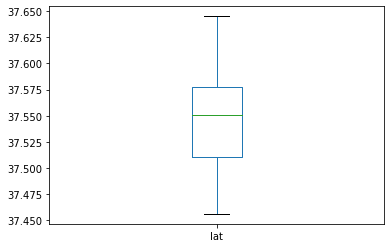

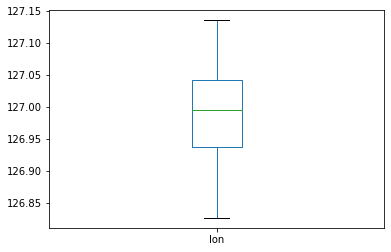

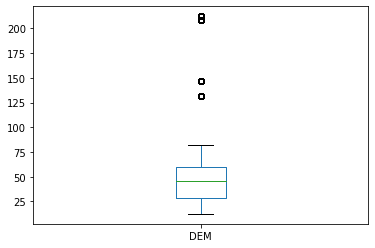

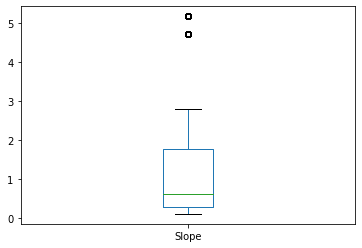

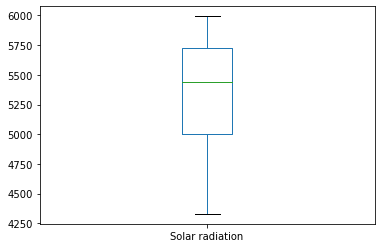

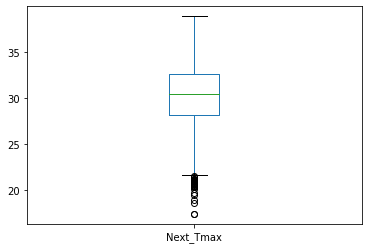

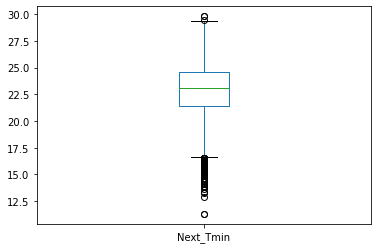

In [44]:
for i in df:
    if df[i].dtype!='object':
        plt.figure()
        df[i].plot(kind='box')

There are outliers present in the dataset. We will be removing these outliers.

## Checking Correlation

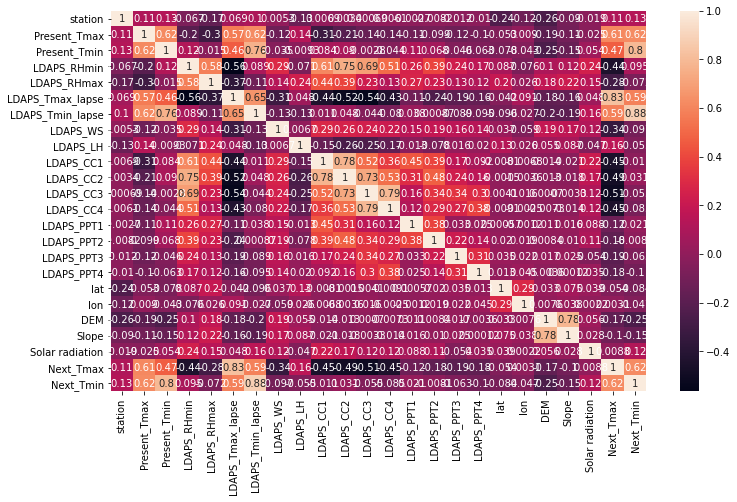

In [38]:
corr_mat=df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_mat,annot=True)
plt.show()

In [39]:
corr_matrix=df.corr()
corr_matrix['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.827189
Next_Tmin           0.621427
Present_Tmax        0.610348
LDAPS_Tmin_lapse    0.586983
Present_Tmin        0.471806
LDAPS_LH            0.157616
station             0.107983
Solar radiation     0.008795
lon                 0.003052
lat                -0.053510
Slope              -0.102725
LDAPS_PPT1         -0.118817
DEM                -0.172538
LDAPS_PPT2         -0.178383
LDAPS_PPT4         -0.178718
LDAPS_PPT3         -0.194143
LDAPS_RHmax        -0.283738
LDAPS_WS           -0.342729
LDAPS_RHmin        -0.437898
LDAPS_CC4          -0.446319
LDAPS_CC1          -0.452541
LDAPS_CC2          -0.490756
LDAPS_CC3          -0.514680
Name: Next_Tmax, dtype: float64


POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation. We can see some variables have positive correlation with the target variable.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation. We can see some variables have negative correlation with the target variable

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. So we can carry on with all features.

LDAPS_Tmax_lapse is most closely related to the target variable. LDAPS_Tmax_lapse, LDAPS_CC3, LDAPS_CC2, Present_Tmin also closely impact the target variable.

In [40]:
corr_matrix=df.corr()
corr_matrix['Next_Tmin'].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.880176
Present_Tmin        0.796670
Present_Tmax        0.622741
Next_Tmax           0.621427
LDAPS_Tmax_lapse    0.586868
station             0.128293
Solar radiation     0.120212
LDAPS_RHmin         0.095019
LDAPS_CC2           0.031250
LDAPS_PPT1          0.021323
LDAPS_PPT2         -0.008058
LDAPS_CC1          -0.011028
lon                -0.046603
LDAPS_CC3          -0.054726
LDAPS_LH           -0.055440
LDAPS_PPT3         -0.062622
LDAPS_RHmax        -0.071997
lat                -0.083533
LDAPS_CC4          -0.085093
LDAPS_WS           -0.096576
LDAPS_PPT4         -0.103682
Slope              -0.146882
DEM                -0.246906
Name: Next_Tmin, dtype: float64

LDAPS_Tmin_lapse, Present_Tmin, Present_Tmax, LDAPS_Tmax_lapse are most closely related with the target variable.

## Handling Outliers

We have seen in the boxplots above that we have outliers in some of the columns.

Lets remove those outliers based on z-score.

In [47]:
# First convert Date into Month, Day and Year.

df[["day", "month", "year"]] = df["Date"].str.split("-", expand = True)

In [49]:
df.drop('Date', axis=1, inplace=True)

In [51]:
df['day']=df['day'].astype(float)
df['month']=df['month'].astype(float)
df['year']=df['year'].astype(float)
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
day                 float64
month               float64
year                float64
dtype: object

Lets calculate the z-score.

In [52]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [53]:
df_new=df[(z<3).all(axis=1)]
df.shape, df_new.shape

((7752, 27), (6894, 27))

We have removed few outliers which had z-score value greater than 3.

z score value indicates how many standard deviations a data point is away from the mean.

## ML Model Building

In [76]:
x=df_new.drop(['Next_Tmax','Next_Tmin'], axis=1)
y=df_new[['Next_Tmax','Next_Tmin']]

In [77]:
x.shape, y.shape

((6894, 25), (6894, 2))

In [80]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

from sklearn.model_selection import train_test_split ,  cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

model_reg = [RandomForestRegressor(), DecisionTreeRegressor(),KNeighborsRegressor(),LinearRegression(normalize=True),
             Ridge(alpha=0.05,normalize=True)]
df_result=pd.DataFrame(columns=['Model','Score','Mean Absolute Error','RMSE','R2 Score'])


for model in model_reg:
    m = model
    test_string=str(m)
    spl_word='('
    print('Model: ',m)
    clf = MultiOutputRegressor(m).fit(x_train, y_train)
    #m.fit(x_train, y_train)
    pred = clf.predict(x_test)
    acc=clf.score(x_train,y_train)
    acc_final=acc
    print('Score: ', acc_final)
    rmse = np.mean(np.sqrt(-cross_val_score(model, x_test, y_test, cv=5, scoring="neg_mean_squared_error")))
    r2_scr=r2_score(y_test,pred)
    #scr=cross_val_score(m,x,y,cv=5,scoring)
    #scr=np.sqrt(np.abs(scr['test_score']))
    #scr_final=np.mean(scr)
    #scr_final=scr.mean()
    print('RMSEe: ',rmse)
    #diff=(acc_final-scr_final)
    mean_abs_error=mae(y_test,pred)
    #print('Difference between cross validation score and accuracy is ', diff)
    print('------------------------------------------------')
    df_result=df_result.append({'Model':test_string,'Score':acc_final,'Mean Absolute Error':mean_abs_error,'RMSE':rmse,'R2 Score':r2_scr}, ignore_index=True)

print(df_result)
    
    

Model:  RandomForestRegressor()
Score:  0.9839862663029101
RMSEe:  1.0558738207709084
------------------------------------------------
Model:  DecisionTreeRegressor()
Score:  1.0
RMSEe:  1.5596736436052425
------------------------------------------------
Model:  KNeighborsRegressor()
Score:  0.6567357234058877
RMSEe:  2.0558394682892724
------------------------------------------------
Model:  LinearRegression(normalize=True)
Score:  0.7802306412258525
RMSEe:  1.2677655479094971
------------------------------------------------
Model:  Ridge(alpha=0.05, normalize=True)
Score:  0.7772276713199078
RMSEe:  1.2765635989463318
------------------------------------------------
                               Model     Score  Mean Absolute Error      RMSE  \
0            RandomForestRegressor()  0.983986             0.654988  1.055874   
1            DecisionTreeRegressor()  1.000000             0.942091  1.559674   
2              KNeighborsRegressor()  0.656736             1.478036  2.055839   

In [81]:
df_result

,Model,Score,Mean Absolute Error,RMSE,R2 Score
0,RandomForestRegressor(),0.983986,0.654988,1.055874,0.896147
1,DecisionTreeRegressor(),1.000000,0.942091,1.559674,0.767594
2,KNeighborsRegressor(),0.656736,1.478036,2.055839,0.507321
3,LinearRegression(normalize=True),0.780231,0.950715,1.267766,0.790748
4,"Ridge(alpha=0.05, normalize=True)",0.777228,0.962730,1.276564,0.787352


- The best possible value for score in linear regression is 1. We have to choose the model which is more closer to 1.
- Mean Absolute Error indicates the difference between the real value and the predicted value. So it should be minimum.
- Root Mean Squared Error (RMSE) is square root of the variance, which indicates how close observed data points are to the predicted data points. So it should be also minimum for a good fit model.
- R2 score indicates the goodness of fit for a model. So higher the R2 score of the model, better the performance.

Now, we can see in the above dataframe that Random Forest Regression is the best fit model for this dataset as it has maximum score and R2 score value (closer to 1) and with least RMSE.

In [83]:
RF=RandomForestRegressor()
clf = MultiOutputRegressor(RF).fit(x_train, y_train)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
acc=clf.score(x_train,y_train)
print('Accuracy is ',acc*100)
print('R2 score ', r2_score(y_test,pred))

Accuracy is  98.40268001450796
R2 score  0.8967944892035249


Our final model has accuracy of 98% with R2 score of 89%, which is good.

In [84]:
print("Predicted result: ",pred)
print("Actual result : ", y_test)

Predicted result:  [[31.86474887 25.768     ]
 [28.71474887 22.3579666 ]
 [27.7422466  23.2313222 ]
 ...
 [27.586      22.121     ]
 [32.9112466  22.86318861]
 [29.59749773 22.2       ]]
Actual result :        Next_Tmax  Next_Tmin
885        30.3       25.1
4383       29.3       22.7
6442       26.1       22.8
4875       31.1       21.1
3115       26.8       19.1
...         ...        ...
5228       30.0       25.6
4846       33.0       21.9
2084       27.7       23.6
4221       31.8       23.2
2263       30.0       22.9

[2069 rows x 2 columns]


## Saving the final model

In [85]:
import joblib
joblib.dump(clf,'Temerature Forecast.obj')

['Temerature Forecast.obj']